# Optimisation

## Libraries import

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

## f(x) and f'(x) functions definition

In [2]:
# f(x) = (x-1)*(x-2)*(x-3)*(x-5)
def f(x):
    return (x-1)*(x-2)*(x-3)*(x-5)

# f'(x) = 4x^3 - 33x^2 + 82x - 61
def df(x):
    return 4*x**3 - 33*x**2 + 82*x - 61

## Display f(x) with x in [0, 6]

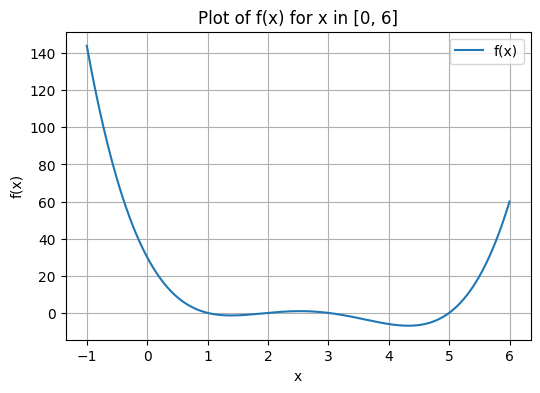

In [3]:
x = np.linspace(-1, 6, 400)
y = f(x)

# Plot f(x) function
plt.figure(figsize=(6, 4))
plt.plot(x, y, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) for x in [0, 6]')
plt.legend()
plt.grid(True)
plt.show()

## Gradient descent algorithm

Final x after iterations: 1.369485392468528


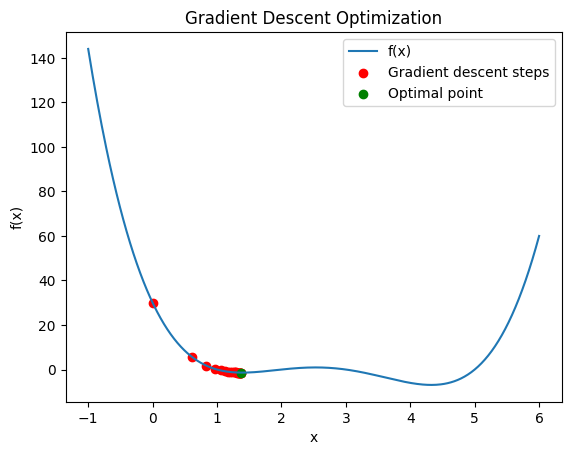

In [4]:
# Gradient Descent Algorithm
# Initial x = x^0
# Learning rate = gamma
# Number of iterations = maximum number of iterations
def gradient_descent(initial_x=0, learning_rate=0.01, num_iterations=20):
    x = initial_x
    history = [x]
    for i in range(num_iterations):
        gradient = df(x)
        x = x - learning_rate * gradient
        history.append(x)
    return x, history

# Run gradient descent
final_x, history = gradient_descent()

# Print the results
print(f"Final x after iterations: {final_x}")

# Plot the results
x_vals = np.linspace(-1, 6, 400)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x)')
plt.scatter(history, [f(x) for x in history], color='red', label='Gradient descent steps')
plt.scatter(final_x, f(final_x), color='green', label='Optimal point')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Optimization')
plt.legend()
plt.show()

## Simulated annealing algorithm

Optimal x: 4.3353, f(x) = -6.9133


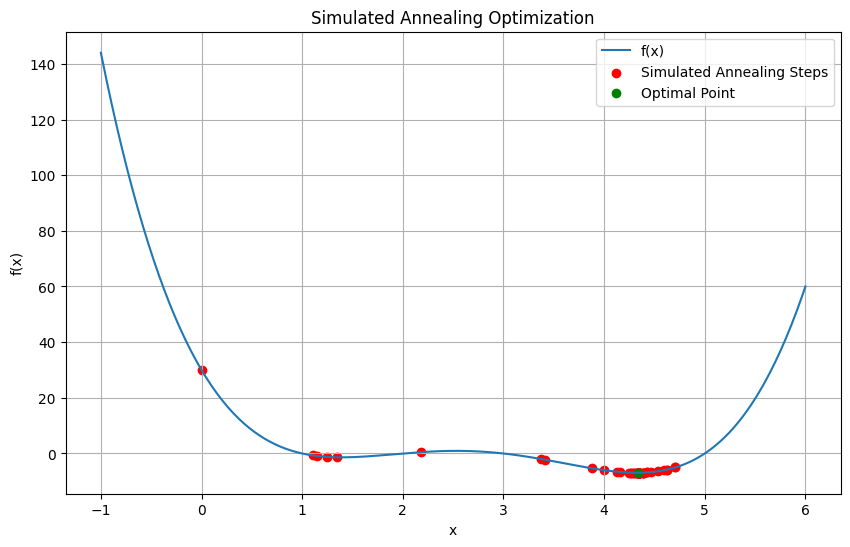

In [5]:
# Simulated Annealing Algorithm
# Initial x = x0
# Initial temperature = T0
# Cooling rate = alpha
# Number of iterations per temperature = long_chain = long palier
# Number of temperatures = max_Tmin = nombre de décroissance de la température
def simulated_annealing(x0, T0, alpha, long_chain, max_Tmin):
    x = x0
    T = T0
    x_history = [x]
    f_history = [f(x)]
    
    for i in range(max_Tmin):
        for _ in range(long_chain):
            x_new = x + np.random.uniform(-1, 1) * T # Generation of a new solution
            delta_f = f(x_new) - f(x)
            
            # Accept the new solution with probability min(1, exp(-delta_f / T))
            if delta_f < 0 or np.random.rand() < np.exp(-delta_f / T):
                x = x_new
        
        x_history.append(x)
        f_history.append(f(x))
        
        T *= alpha # Cool down the temperature
        # print(f"Temperature {i+1}: T = {T:.4f}, x = {x:.4f}, f(x) = {f(x):.4f}")
    
    return x, x_history, f_history

# Initial parameters
x0 = 0
T0 = 100
alpha = 0.75
long_chain = 25
max_Tmin = 100

# Run simulated annealing
optimal_x, x_history, f_history = simulated_annealing(x0, T0, alpha, long_chain, max_Tmin)
print(f"Optimal x: {optimal_x:.4f}, f(x) = {f(optimal_x):.4f}")

# Plotting the function f(x) and the simulated annealing steps
x_vals = np.linspace(-1, 6, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)')
plt.scatter(x_history, f_history, color='red', label='Simulated Annealing Steps')
plt.scatter(optimal_x, f(optimal_x), color='green', label='Optimal Point')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Simulated Annealing Optimization')
plt.legend()
plt.grid(True)
plt.show()

### Simulated annealing algorithm with animation

MovieWriter imagemagick unavailable; using Pillow instead.


Optimal x: 4.3335, f(x) = -6.9135


/var/folders/y0/8vkbb8t13x706lcddt3g102w0000gn/T/ipykernel_2224/3665907061.py:30: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  optimal_point.set_data(x_history[frame], f_history[frame])


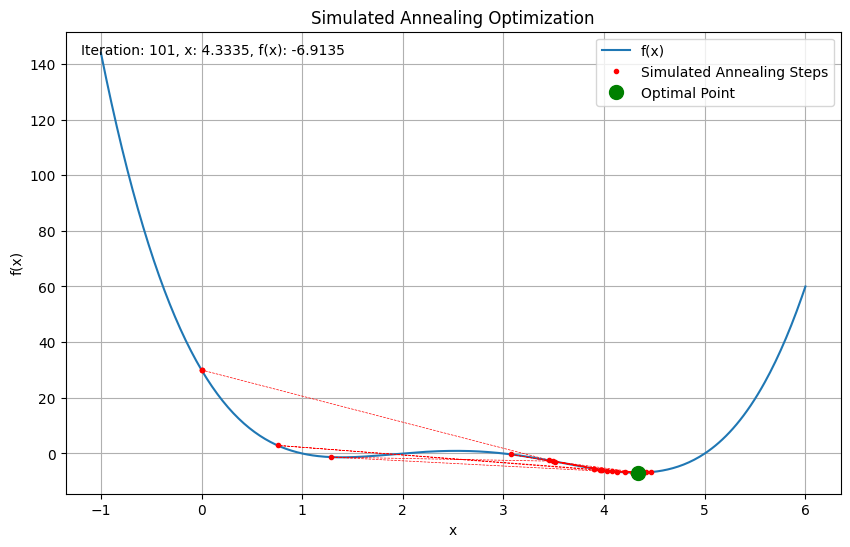

In [6]:
# Run simulated annealing
optimal_x, x_history, f_history = simulated_annealing(x0, T0, alpha, long_chain, max_Tmin)
print(f"Optimal x: {optimal_x:.4f}, f(x) = {f(optimal_x):.4f}")

# Plotting setup
x_vals = np.linspace(-1, 6, 400)
y_vals = f(x_vals)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_vals, y_vals, label='f(x)')
points, = ax.plot([], [], 'ro', label='Simulated Annealing Steps', markersize=3)
line, = ax.plot([], [], 'r--', linewidth=0.5)
optimal_point, = ax.plot([], [], 'go', label='Optimal Point', markersize=10)
text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def init():
    points.set_data([], [])
    line.set_data([], [])
    optimal_point.set_data([], [])
    text.set_text('')
    return points, line, text, optimal_point

def update(frame):
    points.set_data(x_history[:frame+1], f_history[:frame+1])
    line.set_data(x_history[:frame+1], f_history[:frame+1])
    text.set_text(f'Iteration: {frame+1}, x: {x_history[frame]:.4f}, f(x): {f_history[frame]:.4f}')
    
    # Highlight the final optimal point
    if frame == len(x_history) - 1:
        optimal_point.set_data(x_history[frame], f_history[frame])
    
    return points, line, text, optimal_point

ani = FuncAnimation(fig, update, frames=len(x_history), init_func=init, blit=True, repeat=False)
ani.save('simulated_annealing.gif', writer='imagemagick', fps=10)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Simulated Annealing Optimization')
plt.legend()
plt.grid(True)
plt.show()